# Model comparison on Iris

In [1]:
import numpy as np
from scipy import sparse
import pandas as pd
from preamble import *
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [3]:
X, y = iris_dataset.data, iris_dataset.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
print("X_train Shape: {}".format(X_train.shape))
print("y_train Shape: {}".format(y_train.shape))

X_train Shape: (112, 4)
y_train Shape: (112,)


## Starting with Neural Network

In [5]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)

In [6]:
print("Accuracy on training data: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test data: {:.3f}".format(mlp.score(X_test, y_test)))

Accuracy on training data: 1.000
Accuracy on test data: 0.895


### Updating alpha is a win

In [7]:
mlp = MLPClassifier(solver='lbfgs', 
                    random_state=0,
                    alpha=10,
                    hidden_layer_sizes=[100,100]).fit(X_train, y_train)
print("Accuracy on training data: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test data: {:.3f}".format(mlp.score(X_test, y_test)))

Accuracy on training data: 0.982
Accuracy on test data: 0.921


### But scaling the data beats it

In [8]:
# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)

# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(max_iter=1000,
                    alpha=0.564,
                    random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training data: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test data: {:.3}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training data: 0.973
Accuracy on test data: 0.974


## K-nearest Neighbors

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print("Accuracy on training data: {:.3f}".format(knn.score(X_train, y_train)))
print("Accuracy on test data: {:.3f}".format(knn.score(X_test, y_test)))

Accuracy on training data: 0.955
Accuracy on test data: 0.974


In [10]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
print("Accuracy on training data: {:.3f}".format(knn.score(X_train, y_train)))
print("Accuracy on test data: {:.3f}".format(knn.score(X_test, y_test)))

Accuracy on training data: 0.970
Accuracy on test data: 0.947


In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
print("Accuracy on training data: {:.3f}".format(lr.score(X_train, y_train)))
print("Accuracy on test data: {:.3f}".format(lr.score(X_test, y_test)))

Accuracy on training data: 0.938
Accuracy on test data: 0.908


### Scaling doesn't make much difference on LinearRegression

In [12]:
lr = LinearRegression().fit(X_train_scaled, y_train)
print("Accuracy on training data: {:.3f}".format(lr.score(X_train_scaled, y_train)))
print("Accuracy on test data: {:.3f}".format(lr.score(X_test_scaled, y_test)))

Accuracy on training data: 0.938
Accuracy on test data: 0.908


In [13]:
from sklearn.linear_model import Ridge
lr = Ridge().fit(X_train_scaled, y_train)
print("Accuracy on training data: {:.3f}".format(lr.score(X_train_scaled, y_train)))
print("Accuracy on test data: {:.3f}".format(lr.score(X_test_scaled, y_test)))

Accuracy on training data: 0.938
Accuracy on test data: 0.908


In [14]:
lr = Ridge(alpha=10).fit(X_train_scaled, y_train)
print("Accuracy on training data: {:.3f}".format(lr.score(X_train_scaled, y_train)))
print("Accuracy on test data: {:.3f}".format(lr.score(X_test_scaled, y_test)))

Accuracy on training data: 0.931
Accuracy on test data: 0.902


In [15]:
from sklearn.linear_model import Lasso
lr = Lasso().fit(X_train_scaled, y_train)
print("Accuracy on training data: {:.3f}".format(lr.score(X_train_scaled, y_train)))
print("Accuracy on test data: {:.3f}".format(lr.score(X_test_scaled, y_test)))
print("Number of features used: {}".format(np.sum(lr.coef_ != 0)))

Accuracy on training data: 0.000
Accuracy on test data: -0.002
Number of features used: 0


In [16]:
from sklearn.linear_model import Lasso
lr = Lasso(alpha=0.001, max_iter=100000).fit(X_train_scaled, y_train)
print("Accuracy on training data: {:.3f}".format(lr.score(X_train_scaled, y_train)))
print("Accuracy on test data: {:.3f}".format(lr.score(X_test_scaled, y_test)))
print("Number of features used: {}".format(np.sum(lr.coef_ != 0)))

Accuracy on training data: 0.938
Accuracy on test data: 0.908
Number of features used: 4


In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=36).fit(X_train, y_train)
print("Accuracy on training data: {:.3f}".format(lr.score(X_train, y_train)))
print("Accuracy on test data: {:.3f}".format(lr.score(X_test, y_test)))

Accuracy on training data: 0.964
Accuracy on test data: 0.974


In [18]:
lr = LogisticRegression(C=100).fit(X_train, y_train)
print("Accuracy on training data: {:.3f}".format(lr.score(X_train_scaled, y_train)))
print("Accuracy on test data: {:.3f}".format(lr.score(X_test_scaled, y_test)))

Accuracy on training data: 0.571
Accuracy on test data: 0.605


In [19]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB().fit(X_train, y_train)
print("Accuracy on training data: {:.3}".format(nb.score(X_train, y_train)))
print("Accuracy on test data: {:.3f}".format(nb.score(X_test, y_test)))

Accuracy on training data: 0.973
Accuracy on test data: 0.921


In [20]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X_train, y_train)
print("Acccuracy on trainign data: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test data: {:.3f}".format(tree.score(X_test, y_test)))

Acccuracy on trainign data: 1.000
Accuracy on test data: 0.947


In [21]:
tree = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
print("Acccuracy on trainign data: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test data: {:.3f}".format(tree.score(X_test, y_test)))

Acccuracy on trainign data: 0.964
Accuracy on test data: 0.921


In [22]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=list(iris_dataset.target_names),
                feature_names=iris_dataset.feature_names, impurity=False, filled=True)

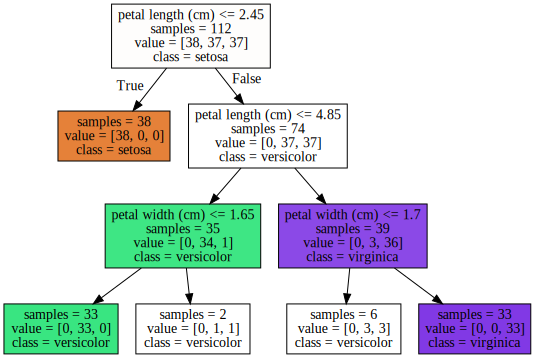

In [23]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

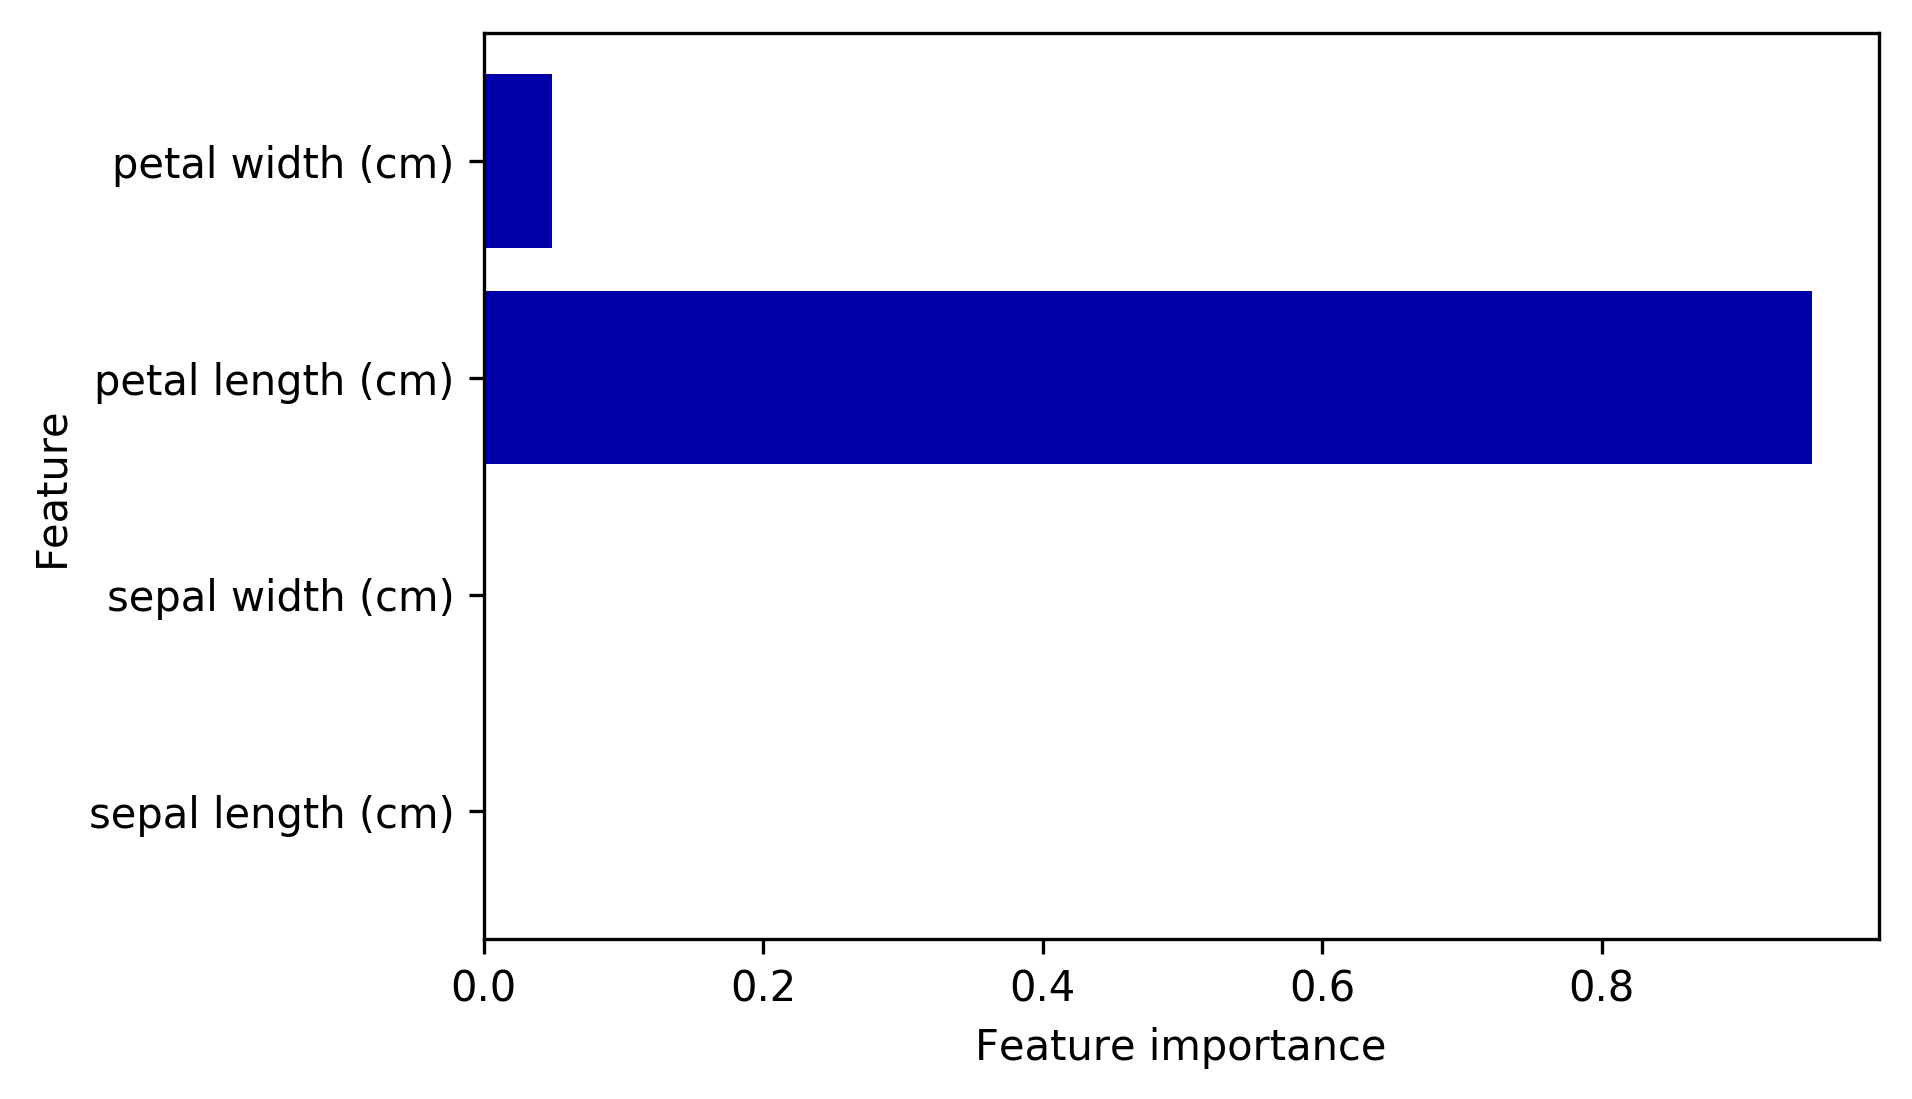

In [24]:
def plot_feature_importances_iris(model):
    n_features = iris_dataset.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), iris_dataset.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances_iris(tree)

In [25]:
from sklearn.ensemble import RandomForestClassifier
tree = RandomForestClassifier(n_estimators=5, max_features=3, random_state=0).fit(X_train, y_train)
print("Acccuracy on trainign data: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test data: {:.3f}".format(tree.score(X_test, y_test)))

Acccuracy on trainign data: 1.000
Accuracy on test data: 0.974


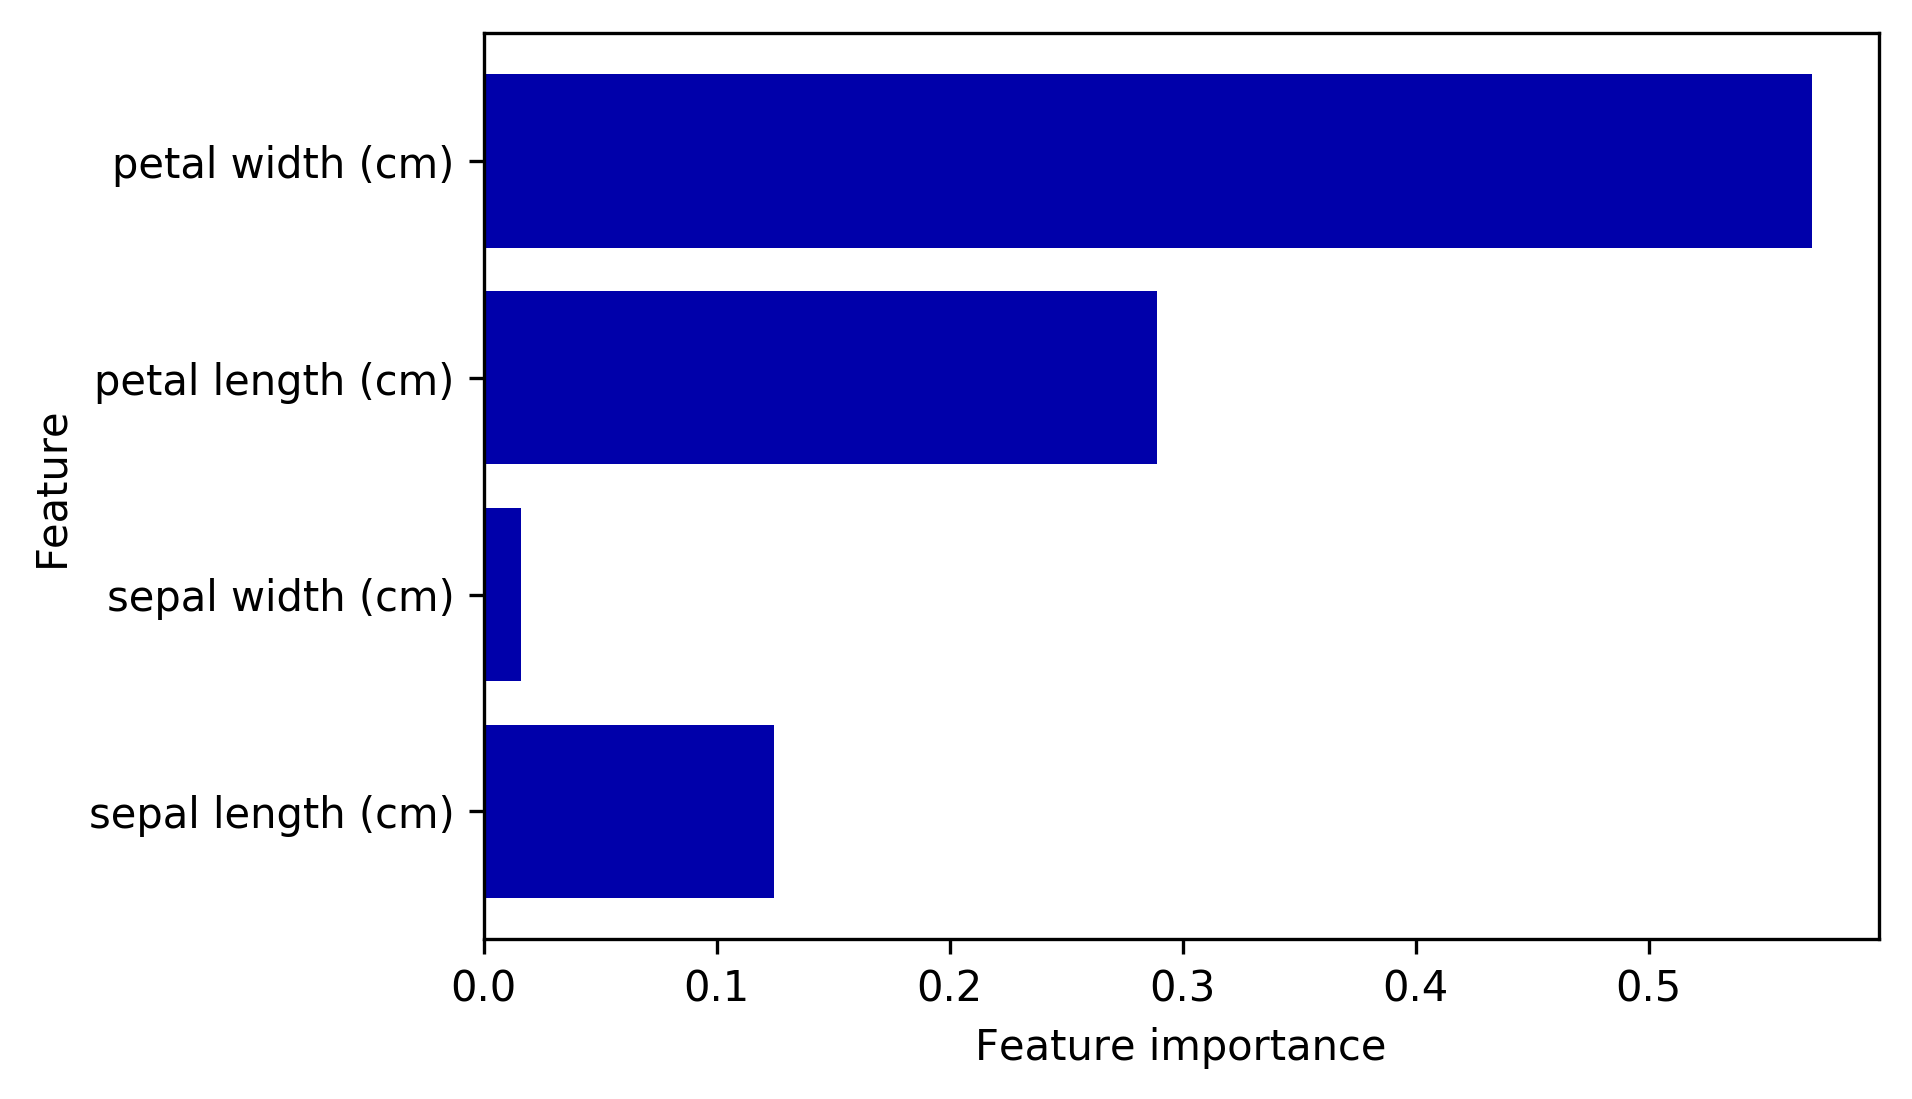

In [26]:
plot_feature_importances_iris(tree)

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier().fit(X_train, y_train)
print("Accuray on training data: {:.3}".format(gb.score(X_train, y_train)))
print("Accuray on testing data: {:.3}".format(gb.score(X_test, y_test)))

Accuray on training data: 1.0
Accuray on testing data: 0.974


In [28]:
gb = GradientBoostingClassifier(max_leaf_nodes=30).fit(X_train, y_train)
print("Accuray on training data: {:.3}".format(gb.score(X_train, y_train)))
print("Accuray on testing data: {:.3}".format(gb.score(X_test, y_test)))

Accuray on training data: 1.0
Accuray on testing data: 0.974


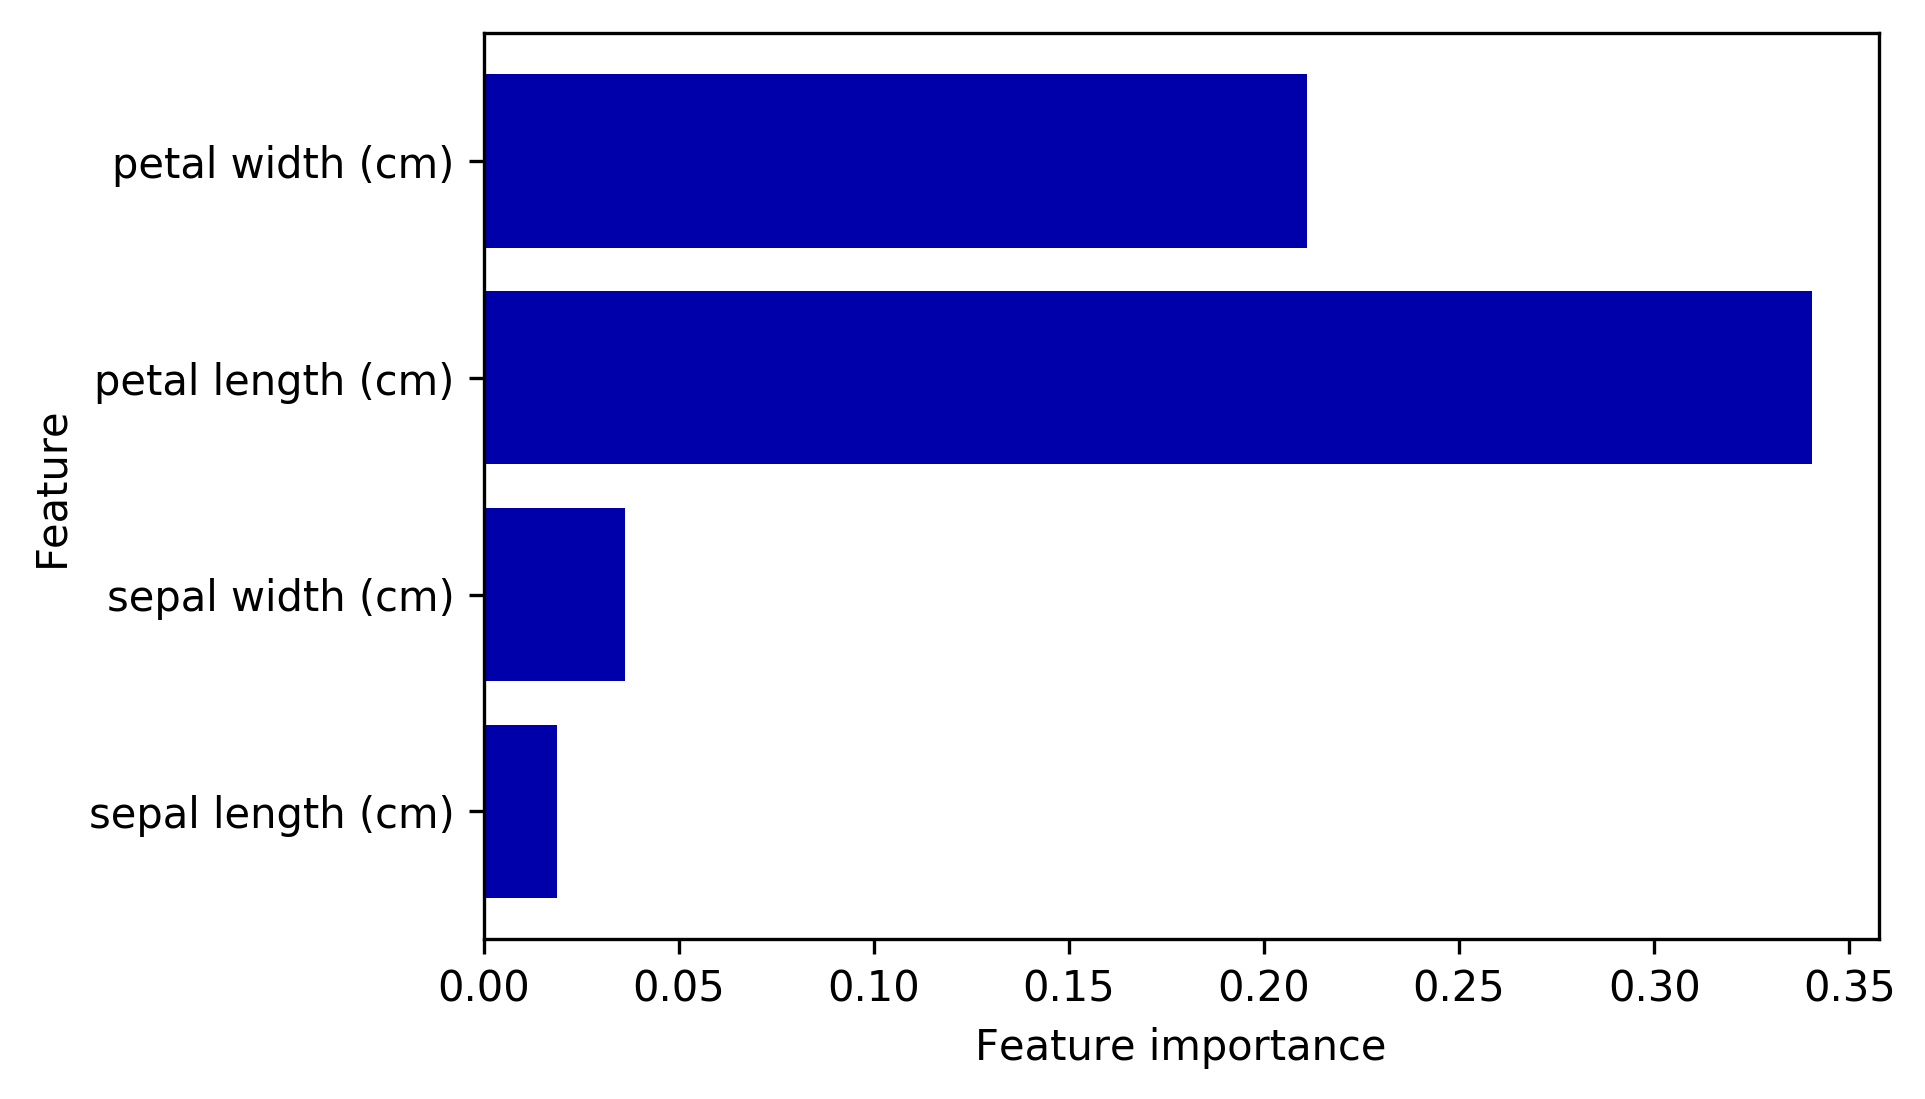

In [29]:
plot_feature_importances_iris(gb)

In [30]:
from sklearn.svm import LinearSVC
svm = LinearSVC().fit(X_train, y_train)
print("Accuray on training data: {:.3}".format(svm.score(X_train, y_train)))
print("Accuray on testing data: {:.3}".format(svm.score(X_test, y_test)))

Accuray on training data: 0.955
Accuray on testing data: 0.921


In [31]:
svm = LinearSVC().fit(X_train_scaled, y_train)
print("Accuray on training data: {:.3}".format(svm.score(X_train_scaled, y_train)))
print("Accuray on testing data: {:.3}".format(svm.score(X_test_scaled, y_test)))

Accuray on training data: 0.964
Accuray on testing data: 0.868


In [32]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X_train, y_train)
print("Accuray on training data: {:.3}".format(svm.score(X_train, y_train)))
print("Accuray on testing data: {:.3}".format(svm.score(X_test, y_test)))

Accuray on training data: 0.982
Accuray on testing data: 0.947


In [33]:
svm = SVC(kernel='rbf', C=1000, gamma=0.01).fit(X_train_scaled, y_train)
print("Accuray on training data: {:.3}".format(svm.score(X_train_scaled, y_train)))
print("Accuray on testing data: {:.3}".format(svm.score(X_test_scaled, y_test)))

Accuray on training data: 0.982
Accuray on testing data: 0.947
